In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import glob
import ipcoal
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import toytree

import iBioGen

import sys
sys.path.append('../')
import BCI

print(ipcoal.__version__, toytree.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.3.0 2.0.5


In [379]:
model = iBioGen.Core("bcitest")
model.set_param("birth_rate", 1)
model.set_param("ntaxa", 100)
model.set_param("J", 5000)
model.set_param("sequence_length", 400)
model.set_param("mutation_rate", 5e-8)
model.set_param("sample_size", 5)
print(model.get_params())

------- iBioGen params file (v.0.0.9)-------------------------------------------
bcitest              ## [0] [simulation_name]: The name of this simulation scenario
./default_iBioGen    ## [1] [project_dir]: Where to save files
1.0                  ## [2] [birth_rate]: Speciation rate
taxa                 ## [3] [meta_stop_criterion]: Whether to stop metacommunity on ntaxa or time
100                  ## [4] [ntaxa]: Number of taxa to simulate if stop is `ntaxa`
4                    ## [5] [time]: Amount of time to simulate if stop is `time`
abundance            ## [6] [process]: Whether to evolve `abundance` or growth `rate` via BM
True                 ## [7] [ClaDS]: Whether to allow speciation rate change a la ClaDS
50000                ## [8] [abundance_mean]: Ancestral abundance at time 0
0.1                  ## [9] [abundance_sigma]: Rate at which abundance changes if process is `abundance`
0                    ## [10] [growth_rate_mean]: Ancestral population growth rate at time 

In [380]:
sim_fastas = {}
for stop_gens in np.linspace(1000, 9999, 1):
    model.set_param("local_stop_time", stop_gens)
    model.simulate(nsims=1)
    fasta_data = model.l.as_fasta()
    fasta_outfile = os.path.join(model.paramsdict["project_dir"], f"gen{stop_gens}.fasta")
    with open(fasta_outfile, 'w') as outfile:
        outfile.write("\n".join(fasta_data))
    sim_fastas[stop_gens] = fasta_outfile

    Generating 1 simulation(s).
  [####################] 100%  Finished 1 simulations in   0:00:00 | 
 

In [381]:
bcis = {}
for gen, fas in sim_fastas.items():
    bci = BCI.BCI(data=fas, project_dir="./default_iBioGen")
    bci._min_clust_threshold = 70
    bci.run(verbose=True)
    bcis[gen] = bci

[88, 32, 19, 16, 11, 7, 5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Aligning..


In [39]:
[x.pis for x in bcis.values()]

[{'m37-1-0': 0.011666666666666665,
  'm31-1-0': 0.022499999999999996,
  'm7-1-0': 0.009999999999999998,
  'm38-1-0': 0.012000000000000002,
  'm9-1-0': 0.012,
  'm19-1-0': 0.04691765878726361,
  'm37-1-1': 0.005,
  'm34-1-0': 0.014999999999999998,
  'm7-1-1': 0.0075},
 {'m36-2-0': 0.009999999999999998,
  'm14-2-0': 0.06666196203871375,
  'm36-2-1': 0.0075,
  'm36-1-0': 0.0125,
  'm52-2-0': 0.01583333333333333,
  'm32-2-1': 0.00125},
 {'m36-2-0': 0.009999999999999998,
  'm14-2-0': 0.08353513917717689,
  'm36-2-1': 0.0075,
  'm47-2-0': 0.010833333333333332,
  'm36-1-0': 0.0125,
  'm52-2-0': 0.01583333333333333,
  'm32-2-1': 0.00125}]

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

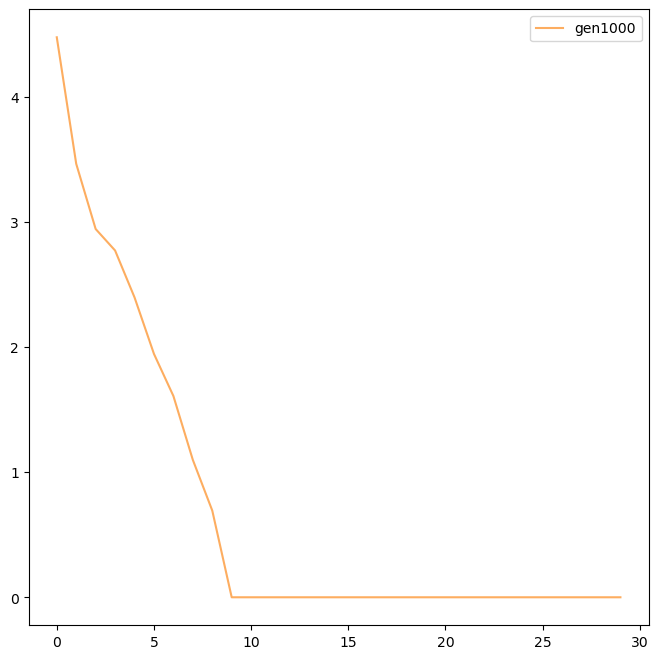

In [382]:
BCI.plot_multi(list(bcis.values()), log=True)

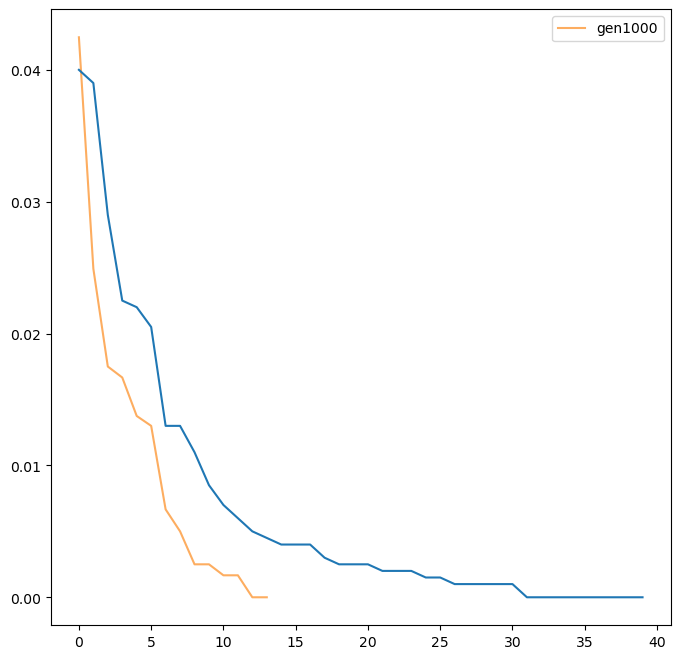

In [387]:
fig, ax = BCI.plot_multi(list(bcis.values()), log=True, plot_pis=True)
ax.plot(sorted(model.l.community["pi"], reverse=True), label='sim')

In [347]:
model.l.community

,coltime,local_abund,migrants,trait,tau,pi,is_founder
m77-1,10.0,96.0,607.0,-2.215140,95.0,0.0370,0.0
m56-1,18.0,84.0,542.0,-1.522139,96.0,0.0050,0.0
m58-1,331.0,35.0,164.0,8.003265,94.0,0.0010,0.0
m30-1,369.0,85.0,312.0,2.040473,99.0,0.0060,0.0
m68-2,559.0,151.0,74.0,3.314826,99.0,0.0145,0.0
m37-2,616.0,91.0,46.0,7.615998,95.0,0.0020,0.0
m86-1,887.0,149.0,27.0,-1.572420,93.0,0.0050,0.0
m58-2,891.0,64.0,37.0,7.443964,96.0,0.0015,0.0
m65-1,939.0,48.0,23.0,0.380120,94.0,0.0090,0.0
m33-2,945.0,53.0,2.0,2.269120,65.0,0.0075,0.0


In [390]:
tre = model.m.tre
Nes = {}
Nes = {x:y*1e4 for x, y in zip(model.l.community.index, model.l.community['local_abund']) if 'l' not in x}
print(Nes)

# Set Nes for the tips
tre = tre.set_node_values(feature="Ne", values=Nes, default=1e5)
# This works now
#print(tre.get_node_values("Ne", show_tips=True))

# Scale branch lengths from mya to generations
for node in tre.treenode.traverse():
    node.dist = node.dist*1e6
rt = tre.treenode.get_tree_root()
print(rt.height)

# Set Ne to None here to honor the Ne values on the nodes of the tree
ipmodel = ipcoal.Model(tre, Ne=None, recomb=0, mut=5e-9, nsamples={x:5 for x in Nes.keys()})
ipmodel.sim_loci(nloci=1, nsites=200)
ipmodel.write_concat_to_phylip(outdir="./default_iBioGen", name="test.phy")
BCI.phylip_to_fasta("./default_iBioGen/test.phy", verbose=True)

{'m103-2': 1020000.0, 'm72-1': 5010000.0, 'm129-1': 2120000.0, 'm42-2': 2610000.0, 'm62-1': 8430000.0, 'm56-2': 3700000.0, 'm125-1': 5170000.0, 'm62-2': 2640000.0, 'm104-2': 690000.0, 'm99-1': 1100000.0, 'm124-1': 570000.0, 'm25-1': 1140000.0, 'm90-2': 360000.0, 'm36-1': 1250000.0, 'm124-2': 640000.0, 'm81-1': 2920000.0, 'm100-2': 250000.0, 'm94-1': 90000.0, 'm116-2': 470000.0, 'm128-2': 2140000.0, 'm98-2': 900000.0, 'm103-1': 330000.0, 'm100-1': 1130000.0, 'm95-1': 80000.0, 'm131-1': 190000.0, 'm131-2': 30000.0, 'm116-1': 590000.0, 'm112-2': 1270000.0, 'm95-2': 150000.0, 'm123-1': 200000.0, 'm65-1': 140000.0, 'm70-1': 40000.0, 'm98-1': 170000.0, 'm30-1': 100000.0, 'm128-1': 10000.0, 'm132-1': 40000.0, 'm125-2': 30000.0, 'm48-2': 10000.0, 'm110-1': 10000.0}
8904566.446742598
wrote concat locus (195 x 200bp) to /Users/isaac/Documents/IMEMEBA-BCI/jupyter-notebooks/default_iBioGen/test.phy
./default_iBioGen/test.fasta


'./default_iBioGen/test.fasta'

In [391]:
bci = BCI.BCI(data='./default_iBioGen/test.fasta', project_dir="./default_iBioGen")
bci.run(verbose=True)

[97, 47, 31, 24, 18, 10, 8, 8, 4, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1]
Aligning..


40
23


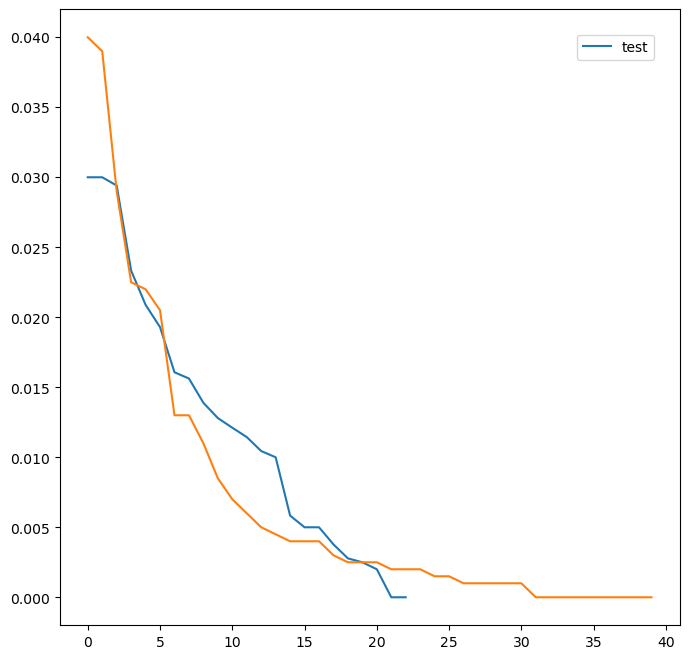

In [392]:
print(len(model.l.community["pi"]))
print(len(bci.pis))
fig, ax = bci.plot(plot_pis=True)
ax.plot(sorted(model.l.community["pi"], reverse=True), label="simulated")

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

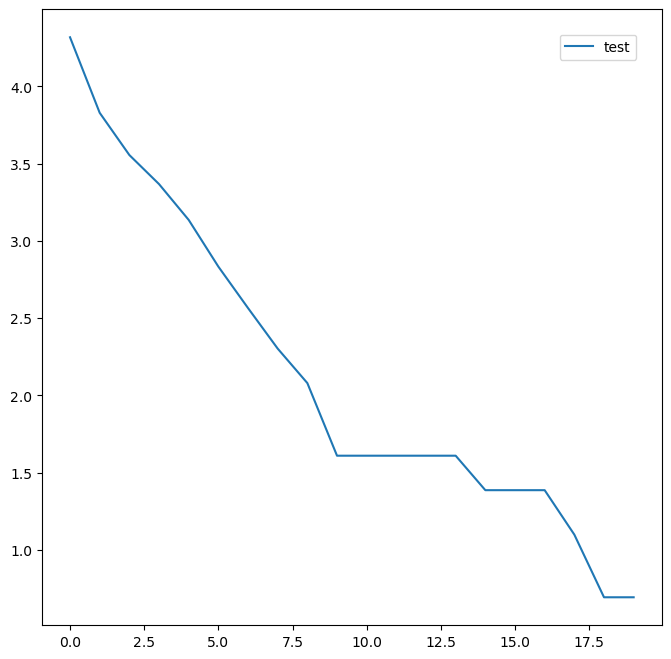

In [367]:
bci.plot(log=True)

In [350]:
tre = model.m.tre.copy()
rt = tre.treenode.get_tree_root()
print(rt.height)
#print(tre.get_node_dict())
tre.get_node_values("height", show_tips=True)
for node in tre.treenode.traverse():
    node.dist = node.dist*1e6
#    print(node.name, node.height)
rt = tre.treenode.get_tree_root()
#rt.height
#rt._height = rt.height*10
rt.height

8.409038935742302


8409038.935742302

In [346]:
tre.draw()

(<toyplot.canvas.Canvas at 0x7fd521aaeb10>,
 <toytree.Render.ToytreeMark at 0x7fd562fc2c90>)

<svg class="toyplot-canvas-Canvas" height="1000.0px" id="t84f1f8f0d29c49eb8ee403de9c35dfa6" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 280.0 1000.0" width="280.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> m83-2 m83-1 m90-2 m90-1 m46-2 m46-1 m32-2 m56-2 m56-1 m95-2 m95-1 m55-2 m55-1 m29-2 m98-2 m98-1 m84-2 m93-2 m93-1 m44-1 m58-2 m58-1 m33-2 m33-1 m68-2 m68-1 m30-1 m62-2 m62-1 m57-1 m49-1 m48-2 m48-1 m101-2 m101-1 m100-1 m88-1 m70-2 m70-1 m51-2 m61-2 m61-1 m81-2 m81-1 m78-2 m78-1 m66-1 m64-1 m63-1 m60-1 m26-2 m26-1 m59-2 m59-1 m37-2 m65-2 m65-1 m96-2 m96-1 m92-2 m89-1 m94-2 m94-1 m50-2 m40-2 m40-1 m35-2 m85-2 m85-1 m86-2 m86-1 m79-2 m79-1 m41-2 m99-2 m99-1 m54-2 m67-2 m67-1 m47-1 m43-1 m97-2 m97-1 m87-1 m73-1 m82-2 m82-1 m74-2 m74-1 m36-2 m69-2 m69-1 m91-2 m91-1 m80-1 m76-1 m45-1 m77-2 m77-1 m16-2

In [344]:
tre = model.m.tre.copy()
tre.get_node_values("Ne", show_tips=True, show_root=True)

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '1098',
       '6253', '608', '7', '76', '23', '4', '7', '152', '279', '80', '10',
       '16', '8', '7', '11', '15', '9', '2', '837', '95', '75', '1047',
       '20', '149', '71', '1882', '927', '1978', '2163', '211', '3', '2',
       '4', '2', '4', '17', '6', '14', '259', '5', '28', '19', '3148',
       '1581', '1196', '17', '23', '3560', '221', '104', '11', '3', '3',
       '2', '3', '27', '5', '28', '38', '47', '11', '49', '301', '280',
       '172', '113', '167', '106', '108', '5', '2', '9', '5001', '425',
       '1606', '119', '479', '2634', '2766', 

In [ ]:
# Fail to do it with msprime

In [74]:
import msprime

tre = model.m.tre.write(tree_format=1)
tre = tre.replace("-", "_")
print(tre)
d = msprime.Demography.from_species_tree(tre, time_units="myr", generation_time=1000000000, initial_size=1e4)

((((((m19_1:0.106641,m19_2:0.106641)m16_1:0.162458,(m18_1:0.172384,m18_2:0.172384)m16_2:0.0967155)m5_1:0.828714,(((m13_1:0.466472,m13_2:0.466472)m12_1:0.0375935,m12_2:0.504066)m10_1:0.164999,m10_2:0.669065)m5_2:0.428749)m4_1:0.150796,(m8_1:0.836438,m8_2:0.836438)m4_2:0.412172)m3_1:0.460207,(m6_1:1.05618,(m7_1:0.908385,(m17_1:0.198928,m17_2:0.198928)m7_2:0.709456)m6_2:0.147797)m3_2:0.652635)m1_1:1.77492,(((m15_1:0.296651,m15_2:0.296651)m11_1:0.329445,m11_2:0.626096)m2_1:2.1891,((m14_1:0.308045,m14_2:0.308045)m9_1:0.491889,m9_2:0.799934)m2_2:2.01526)m1_2:0.668539);


In [81]:
samps = {x.replace("-", "_"):5 for x in model.m.tre.get_tip_labels()}
ts = msprime.sim_ancestry(samples=samps, demography=d, random_seed=12)
tsm = msprime.sim_mutations(ts, rate=1e-3)
tsm